In [176]:
import keras
from keras import backend as k 
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy

In [177]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler


In [178]:
################## Data Generation #########################
train_labels=[]
train_samples=[]
#Generating the Data with Binary output in a random way just for the sake of this DL model training with 2100 input data
for i in range(1000):
    younger=randint(13,61)
    train_samples.append(younger)
    train_labels.append(0)
    olders=randint(62,101)
    train_samples.append(olders)
    train_labels.append(1)
for i in range(50):
    younger=randint(13,61)
    train_samples.append(younger)
    train_labels.append(1)
    olders=randint(62,101)
    train_samples.append(olders)
    train_labels.append(0)
    

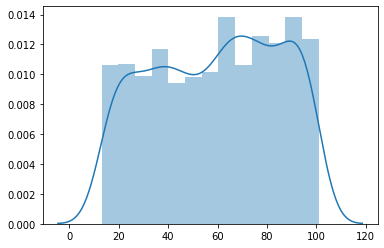

In [179]:
#joint plot
import seaborn as sb
sb.distplot(train_samples)

In [180]:
######################## Data Pre-processing ########################
#converting list to numpy array for keras
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)

# to make is easier for the NN to train this data (do the optimization process) we need to get the data in the followin 
# form inorder to scale the inputes into a smaller range 

scaler= MinMaxScaler(feature_range=(0,1))
scaled_training=scaler.fit_transform((train_samples).reshape(-1,1))



In [181]:
model = Sequential([
    #the first layer has 16 hidden units and an input with arrays of shape (*, 1)
    Dense(16,input_shape=(1,),activation="relu"),
    Dense(32, activation="relu"),
    Dense(2, activation="softmax")
])

In [182]:
#Adam is an optimization method which is a derivation of SGD
model.compile(Adam(lr=0.0001),loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [183]:
model.fit(scaled_training,train_labels,batch_size=10, epochs=30,shuffle=True, verbose=2)    

Epoch 1/30
 - 1s - loss: 0.6757 - accuracy: 0.5205
Epoch 2/30
 - 1s - loss: 0.6360 - accuracy: 0.6200
Epoch 3/30
 - 1s - loss: 0.5979 - accuracy: 0.7043
Epoch 4/30
 - 1s - loss: 0.5645 - accuracy: 0.7581
Epoch 5/30
 - 0s - loss: 0.5329 - accuracy: 0.7910
Epoch 6/30
 - 1s - loss: 0.5024 - accuracy: 0.8319
Epoch 7/30
 - 1s - loss: 0.4725 - accuracy: 0.8495
Epoch 8/30
 - 1s - loss: 0.4440 - accuracy: 0.8686
Epoch 9/30
 - 0s - loss: 0.4179 - accuracy: 0.8819
Epoch 10/30
 - 0s - loss: 0.3938 - accuracy: 0.9005
Epoch 11/30
 - 1s - loss: 0.3722 - accuracy: 0.9062
Epoch 12/30
 - 0s - loss: 0.3535 - accuracy: 0.9157
Epoch 13/30
 - 0s - loss: 0.3380 - accuracy: 0.9200
Epoch 14/30
 - 0s - loss: 0.3251 - accuracy: 0.9281
Epoch 15/30
 - 0s - loss: 0.3144 - accuracy: 0.9329
Epoch 16/30
 - 0s - loss: 0.3055 - accuracy: 0.9314
Epoch 17/30
 - 0s - loss: 0.2977 - accuracy: 0.9333
Epoch 18/30
 - 0s - loss: 0.2917 - accuracy: 0.9390
Epoch 19/30
 - 0s - loss: 0.2862 - accuracy: 0.9367
Epoch 20/30
 - 0s - l

In [29]:
######### Evaluating the model in each epoche with Validation set #############


# There are the following 2 ways if we have already a validate_set we should shuffle before the fitting process
# model.fit(x=scaled_training,y=train_labels,validation_data=validate_set,batch_size=10, epochs=30,shuffle=True, verbose=2) 
from sklearn.utils import shuffle
scaled_training, train_labels = shuffle(scaled_training, train_labels)

model.compile(Adam(lr=0.0001),loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x=scaled_training,y=train_labels,validation_split=0.1,batch_size=10, epochs=30,shuffle=True, verbose=2)  

Train on 1890 samples, validate on 210 samples
Epoch 1/30
 - 1s - loss: 0.6758 - accuracy: 0.5741 - val_loss: 0.6567 - val_accuracy: 0.6048
Epoch 2/30
 - 1s - loss: 0.6452 - accuracy: 0.6392 - val_loss: 0.6209 - val_accuracy: 0.6905
Epoch 3/30
 - 1s - loss: 0.6140 - accuracy: 0.7127 - val_loss: 0.5903 - val_accuracy: 0.7286
Epoch 4/30
 - 0s - loss: 0.5869 - accuracy: 0.7349 - val_loss: 0.5612 - val_accuracy: 0.7714
Epoch 5/30
 - 0s - loss: 0.5595 - accuracy: 0.7598 - val_loss: 0.5318 - val_accuracy: 0.8048
Epoch 6/30
 - 1s - loss: 0.5327 - accuracy: 0.7905 - val_loss: 0.5032 - val_accuracy: 0.8429
Epoch 7/30
 - 1s - loss: 0.5061 - accuracy: 0.8180 - val_loss: 0.4746 - val_accuracy: 0.8619
Epoch 8/30
 - 1s - loss: 0.4798 - accuracy: 0.8370 - val_loss: 0.4472 - val_accuracy: 0.8952
Epoch 9/30
 - 1s - loss: 0.4544 - accuracy: 0.8630 - val_loss: 0.4203 - val_accuracy: 0.8952
Epoch 10/30
 - 1s - loss: 0.4304 - accuracy: 0.8725 - val_loss: 0.3956 - val_accuracy: 0.9238
Epoch 11/30
 - 1s - lo

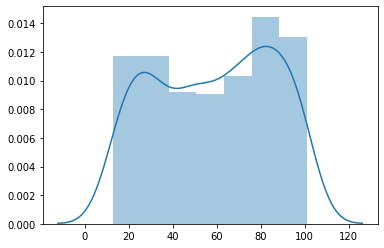

In [184]:
####### Generating an unseen test set ###########
test_labels=[]
test_samples=[]
#Generating the Test data with different distribution 
for i in range(20):
    test_younger=randint(13,61)
    test_samples.append(test_younger)
    test_labels.append(1)
    test_olders=randint(62,101)
    test_samples.append(test_olders)
    test_labels.append(0)
for i in range(200):
    test_younger=randint(13,61)
    test_samples.append(test_younger)
    test_labels.append(0)
    test_olders=randint(62,101)
    test_samples.append(test_olders)
    test_labels.append(1)
    
#joint plot

sb.distplot(test_samples)

So the point is that the preprocessing of the data including turning into numpy array and shuffling and scaling the data is as before 

In [185]:
#converting list to numpy array for keras
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
from sklearn.utils import shuffle
test_samples , test_labels = shuffle(test_samples, test_labels)

scaled_testing=scaler.fit_transform((test_samples).reshape(-1,1))

# Prediction: 


So to predict we use the predict on the same model that we created and trained, and we pass the X, and batch size
is the same as training verbose is 0 because we are not expecting any output. 

In [186]:
prediction= model.predict(x=scaled_testing , batch_size=10, verbose=0)

so that for each input value we are having the probability value for each lable index as bellow:



In [187]:
prediction[:10]

array([[0.08001028, 0.91998976],
       [0.9596464 , 0.0403536 ],
       [0.9591995 , 0.04080049],
       [0.06543021, 0.93456984],
       [0.6972144 , 0.30278552],
       [0.9385961 , 0.06140387],
       [0.06543021, 0.93456984],
       [0.9602609 , 0.03973909],
       [0.31914264, 0.68085736],
       [0.953499  , 0.04650099]], dtype=float32)

So to udrestand better the most probable prediction for each test case we can do the following:

In [188]:
round_prediction= np.argmax(prediction, axis=-1)

In [189]:
round_prediction[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

*** in this case we are considering a real case like in production where we usualy dont have the lables for our test set so we are not applying them to the prediction, but in case we have (like here)these lables we can make a visualisation of the prediction results by ploting them to the ocnfusing matrix.

# Confusion Matrix

In [190]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from pylab import *

In [191]:
cm=confusion_matrix(y_true=test_labels,y_pred=round_prediction)

In [192]:
def plot_confusion_matrix(cm,classes,normalize=False,cmap=plt.cm.Blues):
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('confusion matrix')
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
        print ("normalized confusion matrix")
    else:
        print ("confusion matrix, without normalization")
        
    print (cm)
    
    thresh=cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i , j]> thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predition labale")
    
        

confusion matrix, without normalization
[[199  21]
 [ 20 200]]


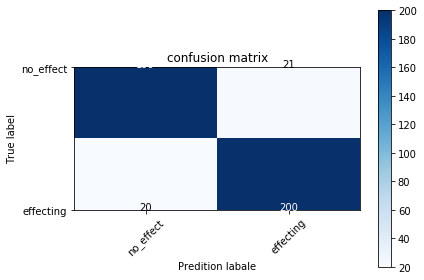

In [193]:
cm_plot_labels=["no_effect","effecting"]
plot_confusion_matrix(cm=cm,classes=cm_plot_labels)

# Saving the Model

In [194]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_17 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 1. model.save()

Keras separates the concerns of saving your model architecture and saving your model weights.
Model weights are saved to HDF5 format. This is a grid format that is ideal for storing multi-dimensional arrays of numbers.

we need to save the trained models in a file and restore them in order to reuse it to compare the model with other models, to test the model on a new data. The saving of data is called Serializaion, while restoring the data is called Deserialization

In [198]:
import os.path
if os.path.isfile("models/keras_first_model_generated_data.h5") is False:
    model.save("models/keras_first_model_generated_data.h5")

## Loading a model

In [2]:
from tensorflow.keras.models import load_model
loaded_model = load_model("models/keras_first_model_generated_data.h5")

In [3]:
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_17 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [8]:
loaded_model.get_weights()[:2]

[array([[ 0.5149925 ,  0.670402  , -0.2545815 ,  0.61965376,  0.21330786,
          0.25868207, -0.51722723, -0.15091419,  0.6020446 , -0.4601997 ,
          0.23758115,  0.30785415,  0.43047333, -0.1835711 , -0.36450005,
          0.42271364]], dtype=float32),
 array([-0.12752333, -0.16922957,  0.        ,  0.25315493, -0.07388986,
        -0.08796801,  0.        ,  0.        , -0.16707085,  0.        ,
         0.10769672, -0.10236   , -0.13203403,  0.        ,  0.        ,
        -0.11755472], dtype=float32)]

In [9]:
loaded_model.optimizer